<a href="https://www.kaggle.com/code/nirmit27/diabetes-prediction?scriptVersionId=178600793" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler as SS
from sklearn.model_selection import train_test_split as tts

from sklearn.svm import SVC as svc

from sklearn.metrics import accuracy_score as accuracy

# **Diabetes** Prediction model
> ### Support Vector Machine

### Importing the dataset

In [2]:
path_ = ""

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if ".csv" in filename:
            path_ = os.path.join(dirname, filename)
        
df = pd.read_csv(path_)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### EDA

In [3]:
df.shape

(768, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.loc[:, "Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


### **Correlational Matrix**
We can observe that `Glucose` feature has the highest correlation with the `Outcome`.

In [7]:
corr_mat = df.corr()

corr_mat["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

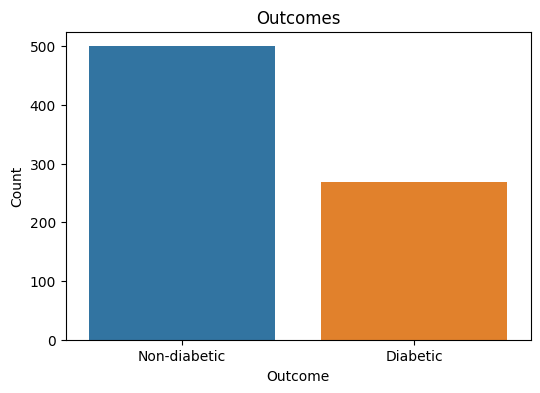

In [8]:
plt.figure(figsize=(6, 4))

sns.countplot(x="Outcome", data=df)

plt.title("Outcomes")
plt.xlabel("Outcome")
plt.ylabel("Count")

plt.xticks([0, 1], ["Non-diabetic", "Diabetic"])

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

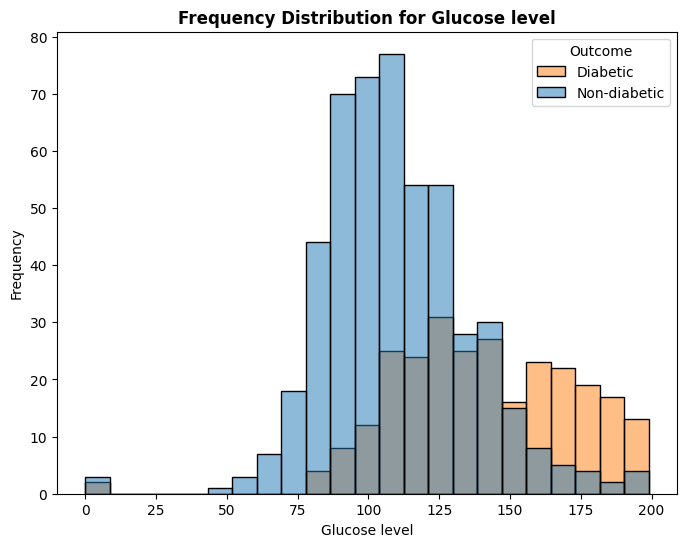

In [9]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df, x="Glucose", hue="Outcome")

plt.title("Frequency Distribution for Glucose level", fontweight="bold")
plt.xlabel("Glucose level")
plt.ylabel("Frequency")

plt.legend(title="Outcome", labels=["Diabetic", "Non-diabetic"])

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

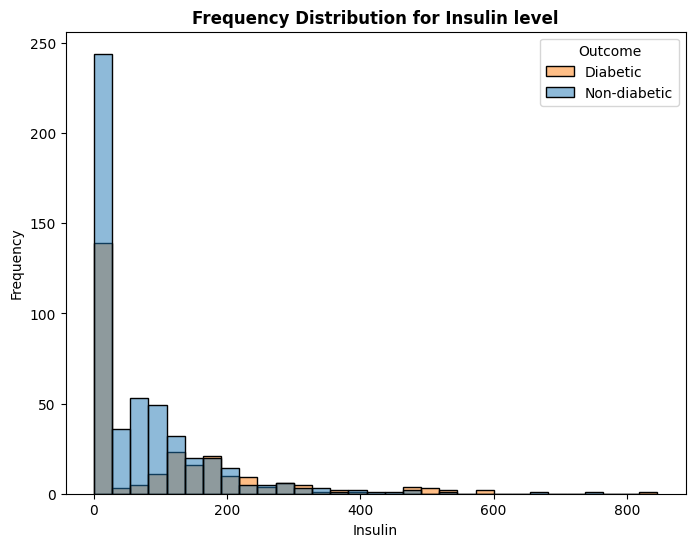

In [10]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df, x="Insulin", hue="Outcome")

plt.title("Frequency Distribution for Insulin level", fontweight="bold")
plt.xlabel("Insulin")
plt.ylabel("Frequency")

plt.legend(title="Outcome", labels=["Diabetic", "Non-diabetic"])

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


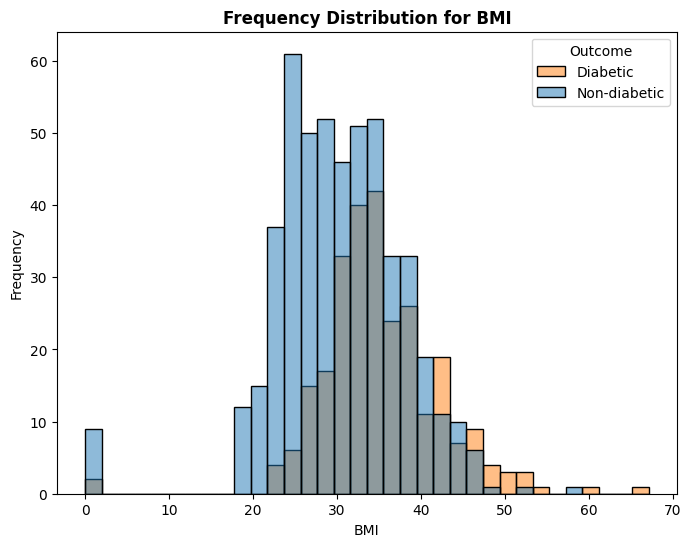

In [11]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df, x="BMI", hue="Outcome")

plt.title("Frequency Distribution for BMI", fontweight="bold")
plt.xlabel("BMI")
plt.ylabel("Frequency")

plt.legend(title="Outcome", labels=["Diabetic", "Non-diabetic"])

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

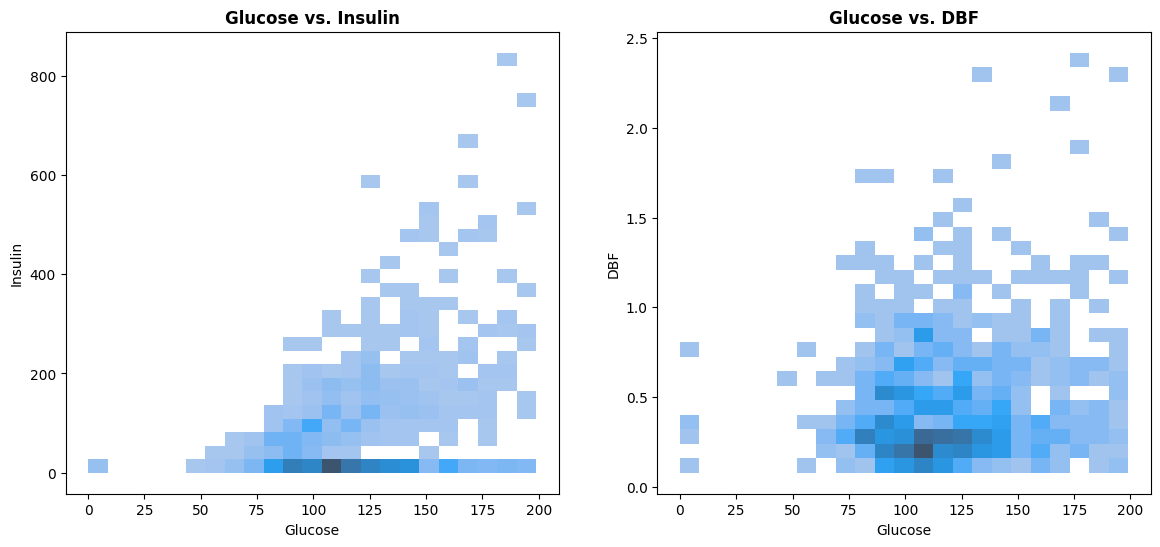

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data=df, x="Glucose", y="Insulin", ax=axs[0])
axs[0].set_title("Glucose vs. Insulin", fontweight="bold")

sns.histplot(data=df, x="Glucose", y="DiabetesPedigreeFunction", ax=axs[1])
axs[1].set_title("Glucose vs. DBF", fontweight="bold")
axs[1].set_ylabel("DBF")

plt.show()

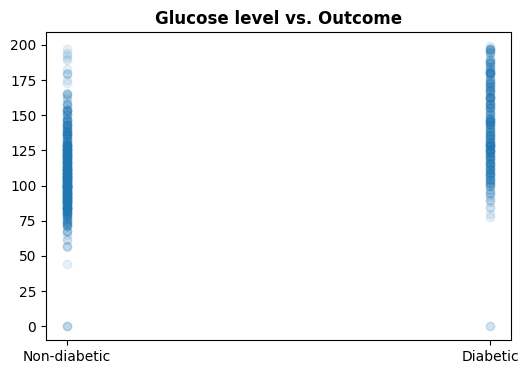

In [13]:
plt.figure(figsize=(6, 4))

plt.scatter(x=df["Outcome"], y=df["Glucose"], alpha=0.10)

plt.title("Glucose level vs. Outcome", fontweight="bold")
plt.xticks([0, 1], ["Non-diabetic", "Diabetic"])

plt.show()

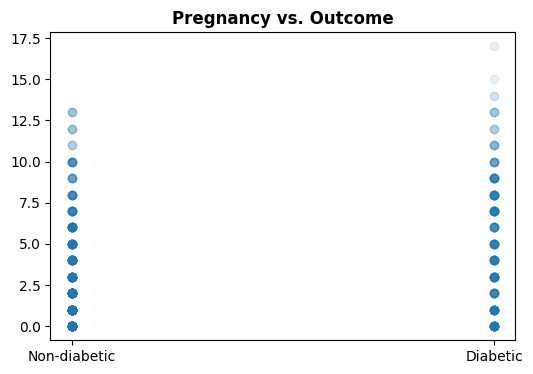

In [14]:
plt.figure(figsize=(6, 4))

plt.scatter(x=df["Outcome"], y=df["Pregnancies"], alpha=0.10)

plt.title("Pregnancy vs. Outcome", fontweight="bold")
plt.xticks([0, 1], ["Non-diabetic", "Diabetic"])

plt.show()

### **Conclusion**
The `Glucose` column has a significant impact on the outcome.

### Preprocessing

In [15]:
X = df[["Glucose", "BMI", "Age", "DiabetesPedigreeFunction", "Insulin"]].values
y = df["Outcome"].values

X

array([[148.   ,  33.6  ,  50.   ,   0.627,   0.   ],
       [ 85.   ,  26.6  ,  31.   ,   0.351,   0.   ],
       [183.   ,  23.3  ,  32.   ,   0.672,   0.   ],
       ...,
       [121.   ,  26.2  ,  30.   ,   0.245, 112.   ],
       [126.   ,  30.1  ,  47.   ,   0.349,   0.   ],
       [ 93.   ,  30.4  ,  23.   ,   0.315,   0.   ]])

In [16]:
ss = SS()
X = ss.fit_transform(X)

X

array([[ 0.84832379,  0.20401277,  1.4259954 ,  0.46849198, -0.69289057],
       [-1.12339636, -0.68442195, -0.19067191, -0.36506078, -0.69289057],
       [ 1.94372388, -1.10325546, -0.10558415,  0.60439732, -0.69289057],
       ...,
       [ 0.00330087, -0.73518964, -0.27575966, -0.68519336,  0.27959377],
       [ 0.1597866 , -0.24020459,  1.17073215, -0.37110101, -0.69289057],
       [-0.8730192 , -0.20212881, -0.87137393, -0.47378505, -0.69289057]])

In [17]:
test_size = 0.3
X_train, X_test, y_train, y_test = tts(X, y, test_size=test_size, stratify=y, random_state=314)

X_test.shape

(231, 5)

### Model training

In [18]:
kernels = ['linear', 'rbf', 'sigmoid']
g = 10.0
c = 10.0

In [19]:
model = svc(kernel=kernels[0], gamma=g, C=c)
model.fit(X_train, y_train)

model

SVC(C=10.0, gamma=10.0, kernel='linear')

### Model testing

#### Training data

In [20]:
y_pred_train = model.predict(X_train)

print(f"Model accuracy on Training data : {round(accuracy(y_pred_train, y_train) * 100, 2)}%")

Model accuracy on Training data : 75.98%


#### Testing data

In [21]:
y_pred = model.predict(X_test)

print(f"Model accuracy on Testing data : {round(accuracy(y_pred, y_test) * 100, 2)}%")

Model accuracy on Testing data : 81.82%


### Prediction system

In [22]:
def prediction(*data):
    data = np.asarray(data)
    data = data.reshape(-1, 1)
    data = ss.fit_transform(data)

    pl = model.predict(data.reshape(1, -1))[0]

    print("Diabetic") if pl else print("Non-diabetic")

In [23]:
# prediction(())